In [119]:
#@title [Candidature form]

Name = '' #@param {type: "string"}
Matriculation_number = '' #@param {type:"string"}
Faculty = ''  #@param {type: "string"}
Course = '' #@param {type:"string"}
Current_semester = "" #@param ["1", "2", "3", "4", "5", "6", "7"] {allow-input: true}

# Linear Regression (Supervised Learning)
## Machine Learning Project - 01 
This project is created and adapted as a Jupyter notebook for [**MME 26849: "Fundamentals of Deep Learning and TinyML"**](https://felix.hs-furtwangen.de/url/RepositoryEntry/4020862983) by the course instructors [Marcus Rüb](https://linkedin.com/in/marcus-rüb-3b07071b2) and [Ajay Krishna](https://linkedin.com/in/ajay-krishna-2031a5119).

## Resouces
Slide from lecture:
[02 - Linear Regression and Support Vector Machines](https://github.com/r1marcus/Fundamentals-of-Deep-Learning-HFU/blob/main/Slides/02%20-%20Linear%20Regression%20and%20Support%20Vector%20Machines/Linear%20Regression%20and%20Support%20Vector%20Machines.pptx)

## Goal of the project
Predicting the cost of a overnight stay in Frankfurt at [Airbnb](https://www.airbnb.com/) accomodation.


## Import libraries 

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

## Load data

Airbnb data from all the major cities in the world can be found [here](http://tomslee.net/airbnb-data-collection-get-the-data).

In particular, the Frankfurt data for our case-study can be found at: https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip

We will be using only the most recent data from 22.06.2017 in our project.

Steps for loading data:

    1. Press the above link "https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip"
    2. Unzip/extract the entire dataset to your local machine (It should consist of 9 .csv files).
    3. Press the folder icon on the left in the Colab window and upload only "tomslee_airbnb_frankfurt_1360_2017-06-22.csv" from the unzipped files.

In [121]:
frankfurt = pd.read_csv('tomslee_airbnb_frankfurt_1360_2017-06-22.csv')

View the top 5 rows in the dataset:

In [122]:
frankfurt.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,14816898,1360,92278018,Shared room,NaN,Frankfurt,NaN,Bahnhofsviertel,51,4.5,10,1.0,NaN,80.0,NaN,2017-06-22 15:39:57.993776,50.108833,8.668395,0101000020E6100000AE9E93DE37562140DFDC5F3DEE0D...
1,15294143,1360,62507234,Shared room,NaN,Frankfurt,NaN,Westend-Süd,27,4.5,2,1.0,NaN,52.0,NaN,2017-06-22 15:39:56.482515,50.120212,8.657187,0101000020E610000074B680D07A5021401B4B581B630F...
2,6751387,1360,17826701,Shared room,NaN,Frankfurt,NaN,Rödelheim,0,0.0,2,1.0,NaN,35.0,NaN,2017-06-22 15:39:54.515975,50.128278,8.596030,0101000020E6100000A9DE1AD82A312140ED65DB696B10...
3,15637480,1360,85072001,Shared room,NaN,Frankfurt,NaN,Oberrad,0,0.0,6,1.0,NaN,346.0,NaN,2017-06-22 15:39:52.319758,50.099801,8.722627,0101000020E6100000C669882AFC712140D68D7747C60C...
4,18244045,1360,68408403,Shared room,NaN,Frankfurt,NaN,Innenstadt,0,0.0,2,1.0,NaN,149.0,NaN,2017-06-22 15:39:47.234792,50.115677,8.694514,0101000020E6100000713AC956976321401FF30181CE0E...


## Data Preparation

Find the fields that don't contain any data:

In [123]:
frankfurt.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.995000e+03,1995.0,1.995000e+03,0.0,0.0,1995.000000,1995.000000,1995.000000,1995.000000,0.0,1995.000000,0.0,1995.000000,1995.000000
mean,1.167641e+07,1360.0,4.092822e+07,NaN,NaN,11.171429,2.544110,2.263659,1.099248,NaN,77.532832,NaN,50.117200,8.666842
std,5.467073e+06,0.0,3.603036e+07,NaN,NaN,25.459738,2.368573,1.315237,0.542270,NaN,59.226681,NaN,0.018407,0.035737
min,6.626700e+04,1360.0,1.659300e+04,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,50.024792,8.489325
25%,7.665019e+06,1360.0,1.032169e+07,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,41.000000,NaN,50.105532,8.645188
50%,1.255222e+07,1360.0,2.991108e+07,NaN,NaN,3.000000,4.000000,2.000000,1.000000,NaN,58.000000,NaN,50.116671,8.670427
75%,1.658699e+07,1360.0,6.171958e+07,NaN,NaN,10.000000,5.000000,2.000000,1.000000,NaN,92.000000,NaN,50.124712,8.691819
max,1.942335e+07,1360.0,1.360651e+08,NaN,NaN,465.000000,5.000000,12.000000,8.000000,NaN,864.000000,NaN,50.206080,8.772625


Note: We can see that columns '**country**', '**borough**', '**bathrooms**', and '**minstay**' has a count of 0.0 which means there is no data present in those columns.

 Drop the columns that has no data:

In [124]:
frankfurt = frankfurt.drop(['country', 'last_modified', 'location', 'borough', 'bathrooms', 'minstay'], axis=1)
frankfurt.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,14816898,1360,92278018,Shared room,Frankfurt,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,15294143,1360,62507234,Shared room,Frankfurt,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,6751387,1360,17826701,Shared room,Frankfurt,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,15637480,1360,85072001,Shared room,Frankfurt,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,18244045,1360,68408403,Shared room,Frankfurt,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


Note: We drop columns such as '**last_modified**' and '**location**' since they are not helpful in the analysis.

Drop other "irrelavant" columns:

In [125]:
frankfurt = frankfurt.drop(['room_id', 'survey_id','host_id', 'city'], axis=1)
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514


Note: We also drop columns such as '**room_id**', '**survey_id**', '**host_id**' and '**city**' since they don't contain valuable information for ML modelling.

Check the data after cleaning:

In [126]:
frankfurt.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,11.171429,2.544110,2.263659,1.099248,77.532832,50.117200,8.666842
std,25.459738,2.368573,1.315237,0.542270,59.226681,0.018407,0.035737
min,0.000000,0.000000,1.000000,0.000000,10.000000,50.024792,8.489325
25%,1.000000,0.000000,2.000000,1.000000,41.000000,50.105532,8.645188
50%,3.000000,4.000000,2.000000,1.000000,58.000000,50.116671,8.670427
75%,10.000000,5.000000,2.000000,1.000000,92.000000,50.124712,8.691819
max,465.000000,5.000000,12.000000,8.000000,864.000000,50.206080,8.772625


Check for missing of null values:

In [127]:
frankfurt.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
dtype: int64

Note: Cool, no missing/null values found.

You are just one step closer becoming an ML Engineer (`just kidding :D`)

## Exploratory Data Analysis (EDA)

EDA helps us improve the understanding of the problem.

### Inspect prices

Plot the price of the room vs density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


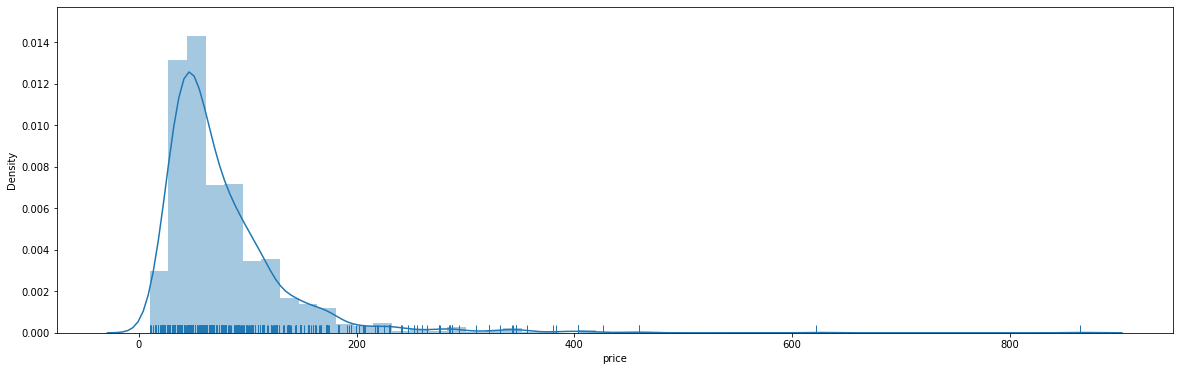

In [128]:
plt.figure(figsize=(20,6))
sb.distplot(frankfurt['price'], rug=True)

### Inspect how the fields affect the price

Let's have a look to the categorical fields: '**room_type**' and '**neighborhood**'

#### How many different room types there are?

In [129]:
frankfurt['room_type'].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

Note: We have three room types namely '**Shared room**', '**Entire home/apt**' and '**Private room**'

#### Which neighborhoods there are in Frankfurt Airbnb?

In [130]:
print(sorted(frankfurt['neighborhood'].unique()))

['Altstadt', 'Bahnhofsviertel', 'Bergen-Enkheim', 'Bockenheim', 'Bonames', 'Bornheim', 'Dornbusch', 'Eckenheim', 'Eschersheim', 'Fechenheim', 'Flughafen', 'Frankfurter Berg', 'Gallus', 'Ginnheim', 'Griesheim', 'Gutleutviertel', 'Harheim', 'Hausen', 'Heddernheim', 'Höchst', 'Innenstadt', 'Kalbach-Riedberg', 'Nied', 'Nieder-Erlenbach', 'Nieder-Eschbach', 'Niederrad', 'Niederursel', 'Nordend-Ost', 'Nordend-West', 'Oberrad', 'Ostend', 'Praunheim', 'Preungesheim', 'Riederwald', 'Rödelheim', 'Sachsenhausen-N.', 'Sachsenhausen-S.', 'Schwanheim', 'Seckbach', 'Sindlingen', 'Sossenheim', 'Unterliederbach', 'Westend-Nord', 'Westend-Süd', 'Zeilsheim']


#### Which room_type has higher prices?

Boxplot:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


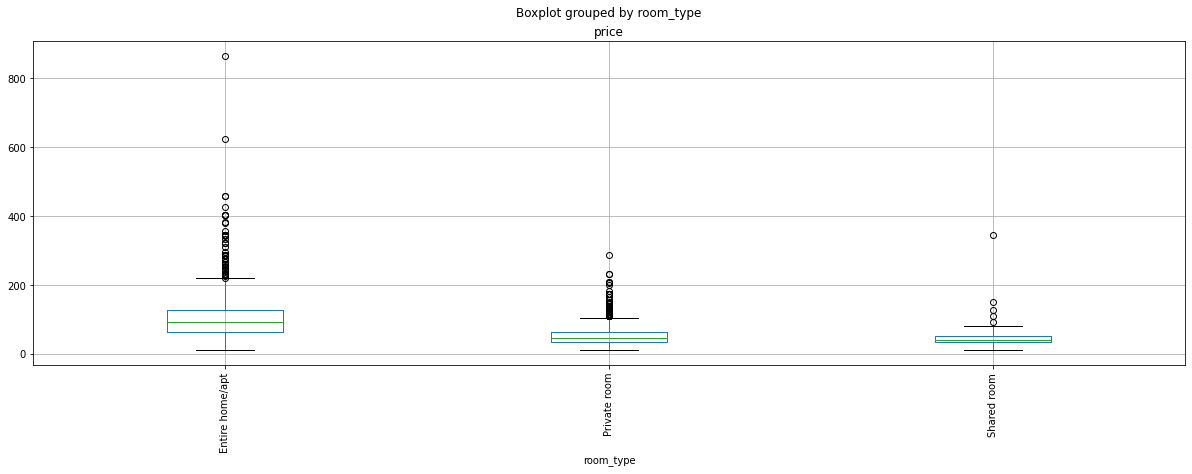

In [131]:
frankfurt.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)

#### Which neighborhoods have higher prices?

Boxplot:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


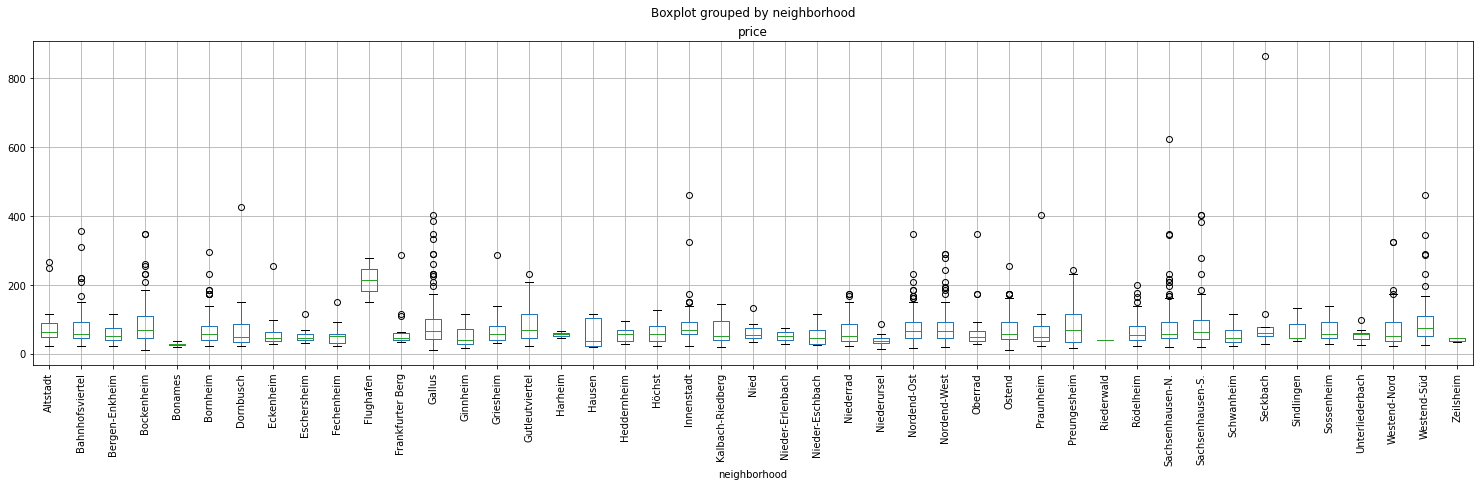

In [132]:
frankfurt.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90);

#### What about longitue and latitude?

Scatter plot:

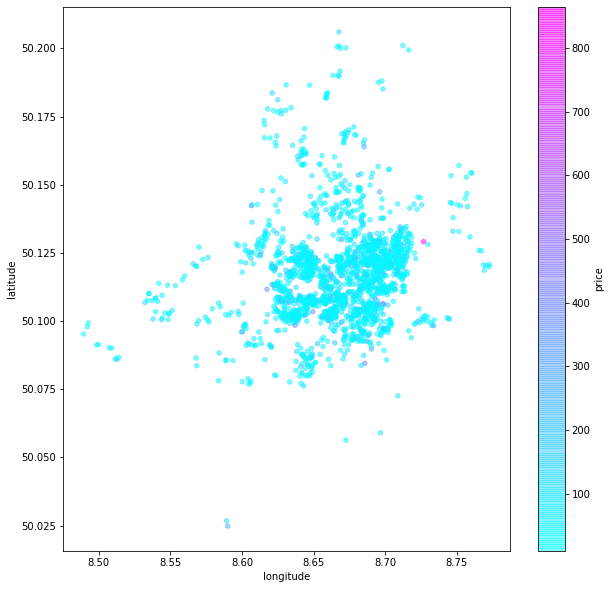

In [133]:
fig, ax = plt.subplots()
frankfurt.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5, ax=ax);

When prices are < $200

Scatter plot:

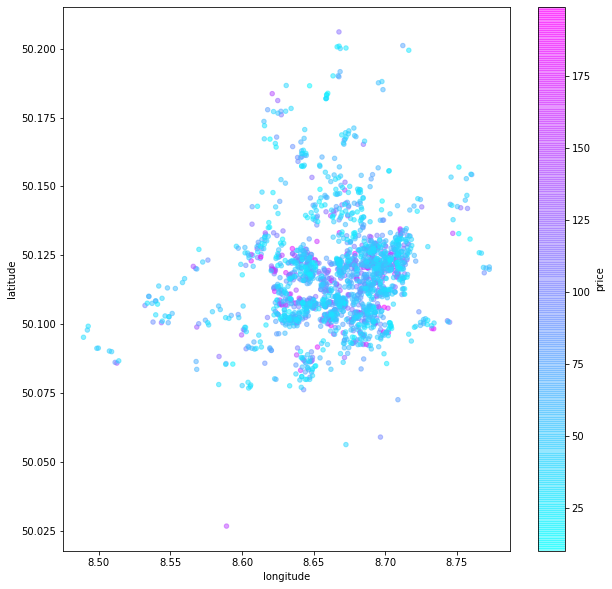

In [134]:
fig, ax = plt.subplots()
frankfurt[frankfurt['price']<200].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5, ax=ax);

#### And reviews?

Scatter plot:

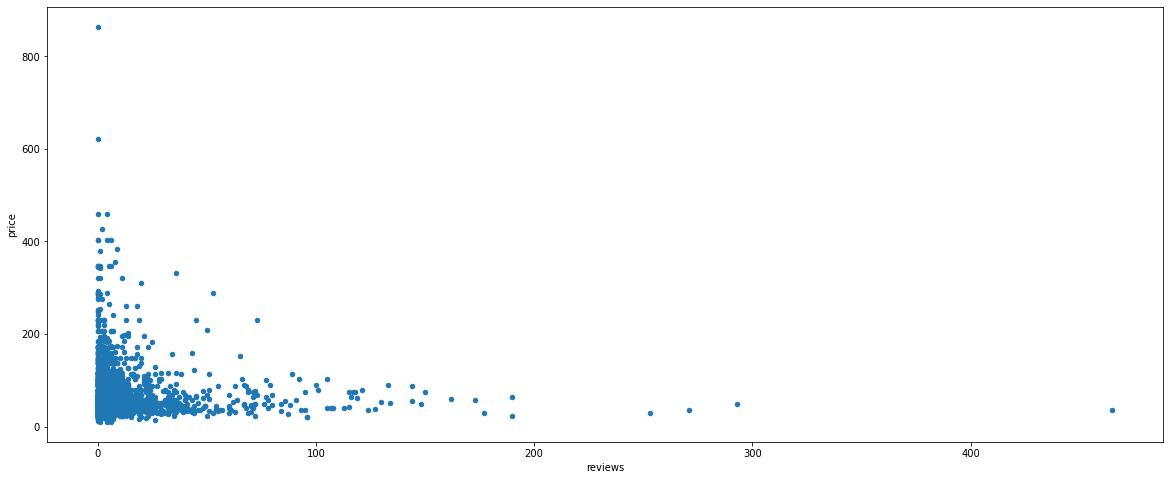

In [135]:
frankfurt.plot.scatter(x='reviews', y='price', figsize=(20,8));

Plot reviews in logarithmic scale:

Scatter plot:

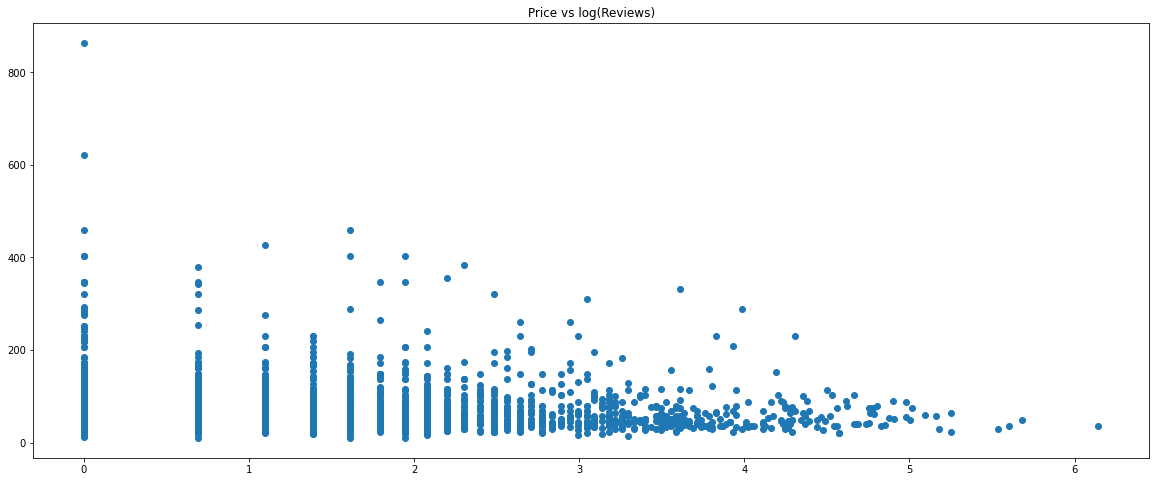

In [136]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+frankfurt['reviews']), frankfurt['price'])
plt.title('Price vs log(Reviews)');

#### Satisfaction?

Scatter plot:

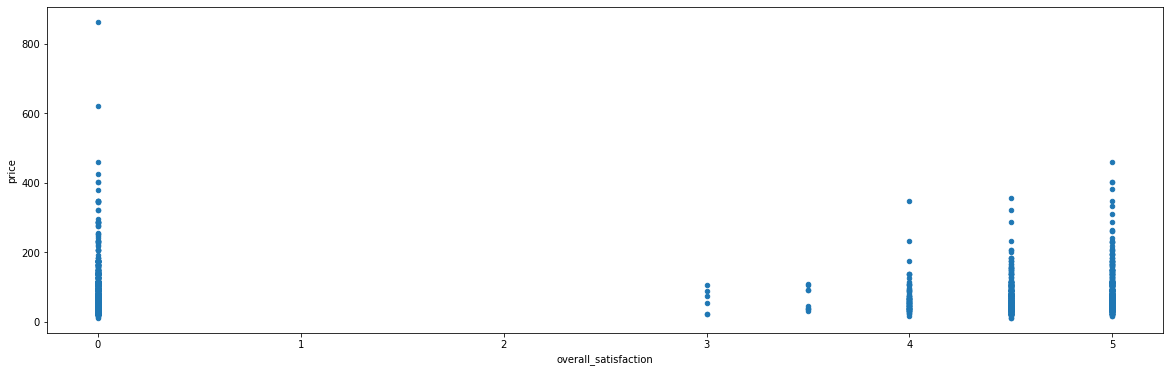

In [137]:
frankfurt.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6));

#### Bedrooms

Scatter plot:

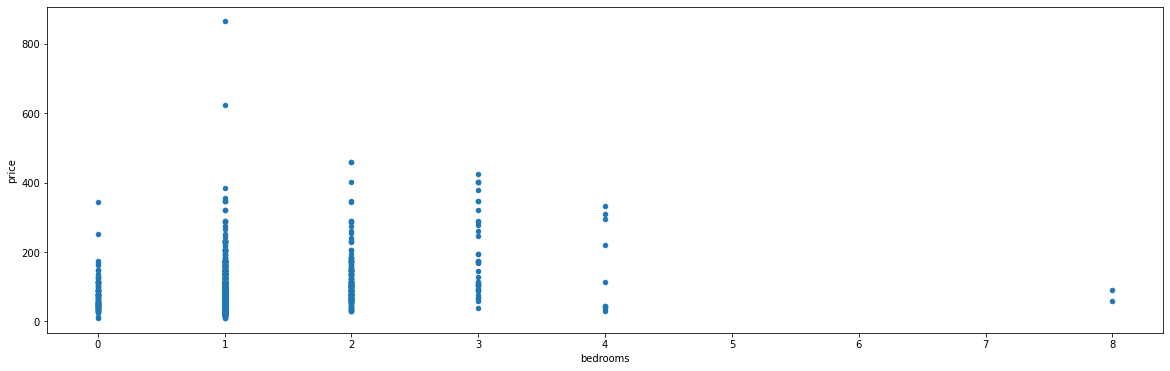

In [138]:
frankfurt.plot.scatter(x='bedrooms', y='price', figsize=(20,6));

#### Accommodates

Scatter plot:

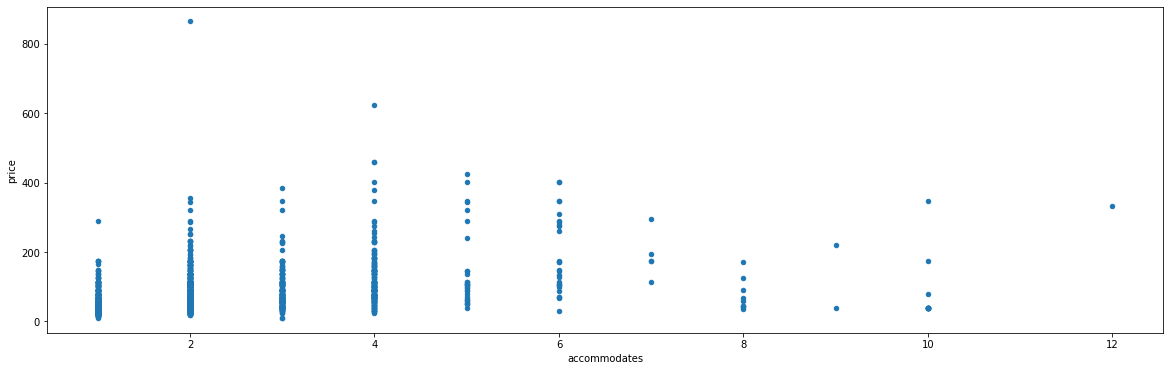

In [139]:
frankfurt.plot.scatter(x='accommodates', y='price', figsize=(20,6));

We just finished the exploratory data analysis and let's move on to cool ML stuff!

## Feature Engineering

Let's add some additional features based on our understanding to make the life easier for the Linear Regression algorithms.

In [140]:
frankfurt['logreviews'] = np.log(1 + frankfurt['reviews'])
frankfurt['bedrooms_per_accommodates'] = frankfurt['bedrooms'] / frankfurt['accommodates']

In [141]:
frankfurt.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates
0,Shared room,Bahnhofsviertel,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000
1,Shared room,Westend-Süd,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000
2,Shared room,Rödelheim,0,0.0,2,1.0,35.0,50.128278,8.596030,0.000000,0.500000
3,Shared room,Oberrad,0,0.0,6,1.0,346.0,50.099801,8.722627,0.000000,0.166667
4,Shared room,Innenstadt,0,0.0,2,1.0,149.0,50.115677,8.694514,0.000000,0.500000


Note: We added new features such as '**logreviews**' and '**bedrooms_per_accomodates**' as columns to our dataset.

### Shall we remove properties without any reviews?
I would go for it ...

During this project we found out that properties with very few number of reviews are very difficult to predict. And we opted to fix the minimum number of reviews to 10. You may change this number and experiment how the results change.

In [142]:
data = frankfurt.copy()
print('amount of data original: ' + str(len(data)))
data = data[data['reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
print('amount of data after removing "few reviews" properties: ' + str(len(data)))

amount of data original: 1995
amount of data after removing "few reviews" properties: 493


Note: There were 1995 datapoints (rows) in our dataset out of which 1502 datapoints consisted of less than 10 reviews and hence we have 493 datapoints to perform further analysis.

Let's encode the '**room_type**' and '**neighborhood**' using ***one-hot encoding***. 

E.g. Split the neighborhood variable in as many different neighborhoods as possible, and set all others to 0 except for the right neighborhood, which will be set to 1. More info in: https://en.wikipedia.org/wiki/One-hot

In [143]:
data = pd.get_dummies(data)
data.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Altstadt,neighborhood_Bahnhofsviertel,neighborhood_Bergen-Enkheim,neighborhood_Bockenheim,neighborhood_Bornheim,neighborhood_Dornbusch,neighborhood_Eckenheim,neighborhood_Eschersheim,neighborhood_Fechenheim,neighborhood_Frankfurter Berg,neighborhood_Gallus,neighborhood_Ginnheim,neighborhood_Griesheim,neighborhood_Gutleutviertel,neighborhood_Hausen,neighborhood_Heddernheim,neighborhood_Höchst,neighborhood_Innenstadt,neighborhood_Kalbach-Riedberg,neighborhood_Nied,neighborhood_Nieder-Erlenbach,neighborhood_Nieder-Eschbach,neighborhood_Niederrad,neighborhood_Niederursel,neighborhood_Nordend-Ost,neighborhood_Nordend-West,neighborhood_Oberrad,neighborhood_Ostend,neighborhood_Praunheim,neighborhood_Preungesheim,neighborhood_Rödelheim,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
0,51,4.5,10,1.0,80.0,50.108833,8.668395,3.951244,0.100000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27,4.5,2,1.0,52.0,50.120212,8.657187,3.332205,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,21,4.5,2,1.0,109.0,50.116308,8.679903,3.091042,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,31,4.5,3,1.0,79.0,50.114359,8.685874,3.465736,0.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,15,5.0,2,1.0,60.0,50.107130,8.626485,2.772589,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
X = data.copy().drop('price', axis = 1)
y = data['price'].copy()

Split data in training and testing sets

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


Scale data to have similar dimensions

In [146]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline

In [147]:
baseline = y_train.median() #median train
print('If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: ' + str(baseline))

If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: 52.0


In [148]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 40.685556603406965


## Machine Learning

In [149]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [150]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 30.09570965505257, mrse_test: 40846805946815.37
Ridge mrse_train: 30.947164879702502, mrse_test: 33.91625146904816 best alpha: 50.0
Lasso mrse_train: 31.239735981546882, mrse_test: 34.998818881721924 best alpha: 1.0
ElasticNet mrse_train: 31.517635209291736, mrse_test: 33.78573172030977 best alpha: 1.0 best l1: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.22128382808296, tolerance: 71.32379118644069
  tol, rng, random, positive)


Note: The testing error from Ridge, Lasso and ElasticNet are much better than the baseline testing errors!

Non-zero Lasso coefficients ordered by importance

In [151]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

bedrooms, 19.421910770162146
room_type_Entire home/apt, 18.531751715686227
neighborhood_Westend-Nord, 7.5253830655997325
overall_satisfaction, 4.590400155936171
neighborhood_Gallus, 3.8925117462495957
neighborhood_Rödelheim, 1.4821066555712175
neighborhood_Gutleutviertel, 0.9747665630145226
neighborhood_Sachsenhausen-S., 0.8464605678057351
neighborhood_Westend-Süd, 0.6488020165061684
neighborhood_Bockenheim, 0.5109365249086493
neighborhood_Bahnhofsviertel, 0.24155470240333513


## Error Analysis

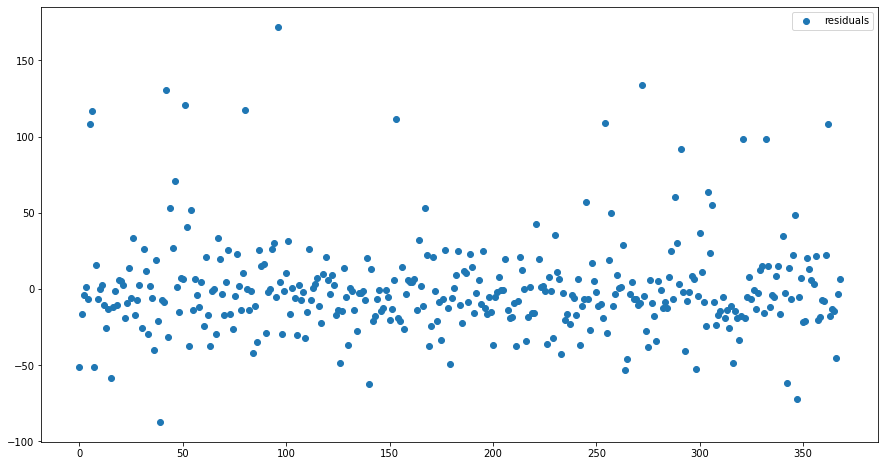

In [152]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [153]:
X_train[np.abs(diff) > 100].describe()

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,logreviews,bedrooms_per_accommodates,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Altstadt,neighborhood_Bahnhofsviertel,neighborhood_Bergen-Enkheim,neighborhood_Bockenheim,neighborhood_Bornheim,neighborhood_Dornbusch,neighborhood_Eckenheim,neighborhood_Eschersheim,neighborhood_Fechenheim,neighborhood_Frankfurter Berg,neighborhood_Gallus,neighborhood_Ginnheim,neighborhood_Griesheim,neighborhood_Gutleutviertel,neighborhood_Hausen,neighborhood_Heddernheim,neighborhood_Höchst,neighborhood_Innenstadt,neighborhood_Kalbach-Riedberg,neighborhood_Nied,neighborhood_Nieder-Erlenbach,neighborhood_Nieder-Eschbach,neighborhood_Niederrad,neighborhood_Niederursel,neighborhood_Nordend-Ost,neighborhood_Nordend-West,neighborhood_Oberrad,neighborhood_Ostend,neighborhood_Praunheim,neighborhood_Preungesheim,neighborhood_Rödelheim,neighborhood_Sachsenhausen-N.,neighborhood_Sachsenhausen-S.,neighborhood_Schwanheim,neighborhood_Seckbach,neighborhood_Sindlingen,neighborhood_Sossenheim,neighborhood_Unterliederbach,neighborhood_Westend-Nord,neighborhood_Westend-Süd,neighborhood_Zeilsheim
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,31.200000,4.750000,4.50000,2.000000,50.106076,8.644842,3.289717,0.458333,0.700000,0.300000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,21.006877,0.353553,3.02765,1.247219,0.008000,0.021932,0.629318,0.119477,0.483046,0.483046,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516398,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.000000,4.000000,2.00000,1.000000,50.093318,8.613102,2.564949,0.250000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,14.500000,4.500000,2.25000,1.000000,50.101658,8.629685,2.728226,0.375000,0.250000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,21.500000,5.000000,4.00000,1.500000,50.107139,8.639326,3.111288,0.500000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,46.500000,5.000000,5.50000,2.750000,50.107754,8.660793,3.851599,0.500000,1.000000,0.750000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,73.000000,5.000000,12.00000,4.000000,50.124423,8.681199,4.304065,0.666667,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Print the size high and low error:

In [154]:
high_error = X_train[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 14
size low error: 148


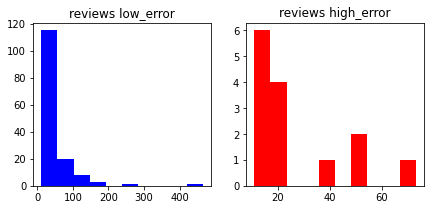

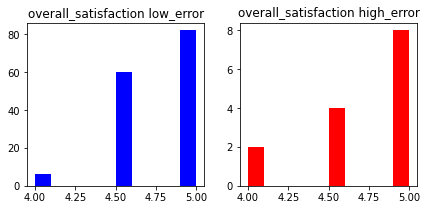

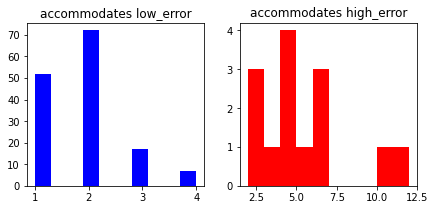

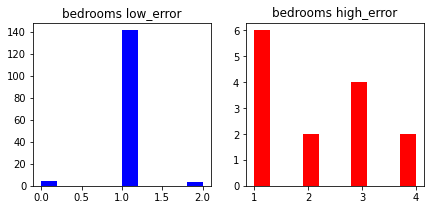

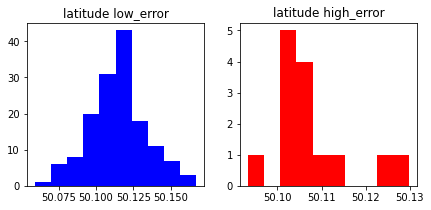

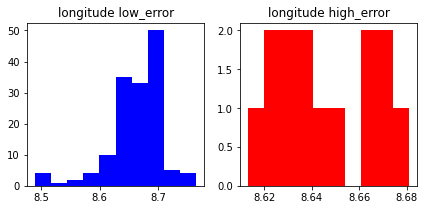

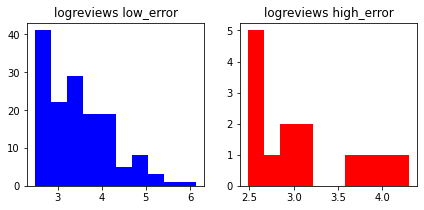

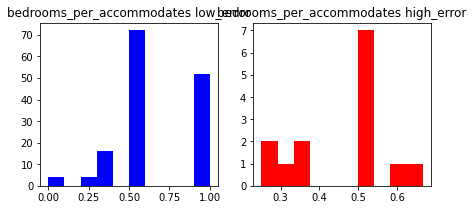

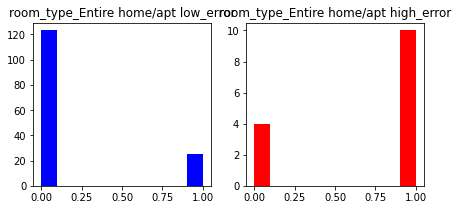

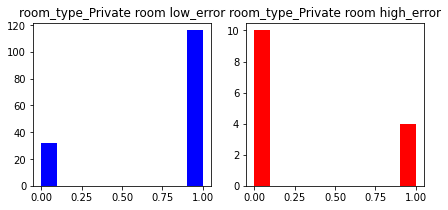

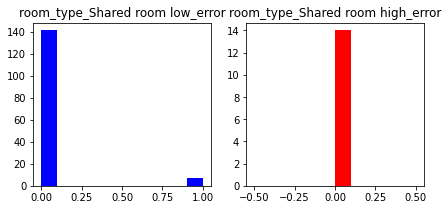

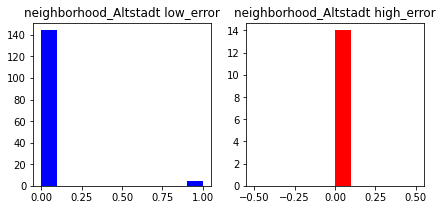

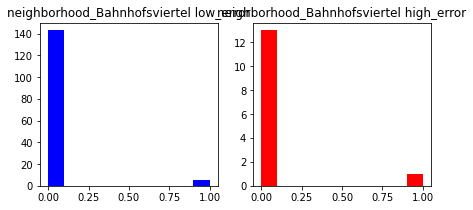

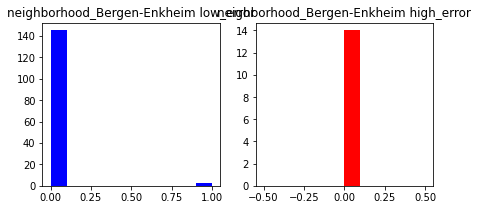

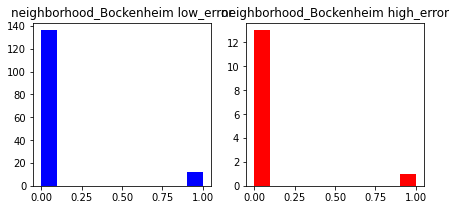

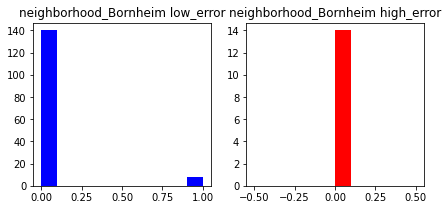

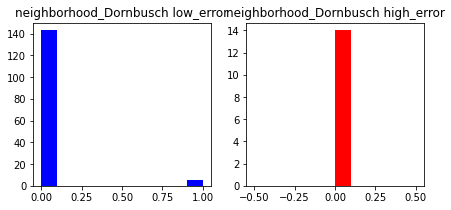

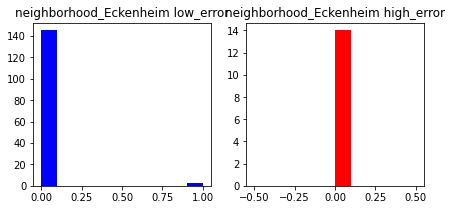

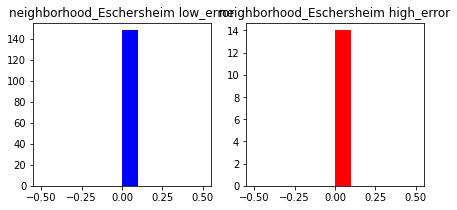

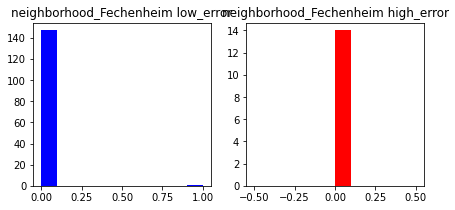

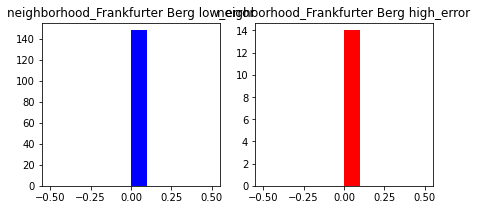

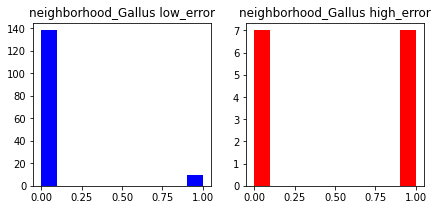

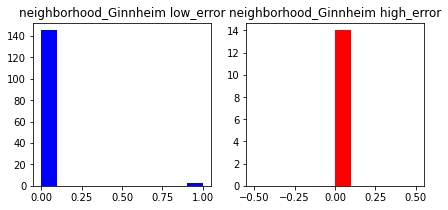

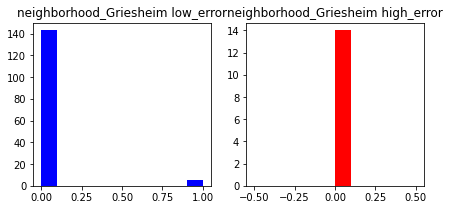

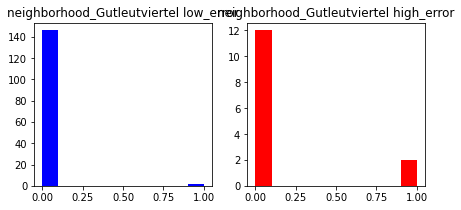

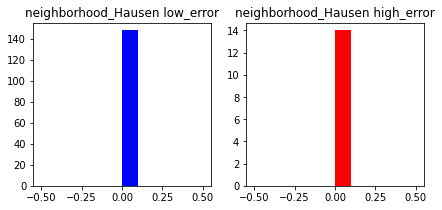

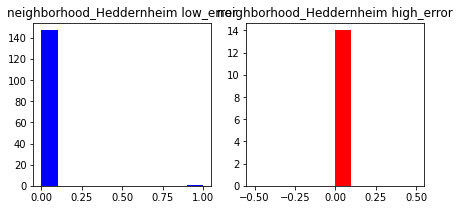

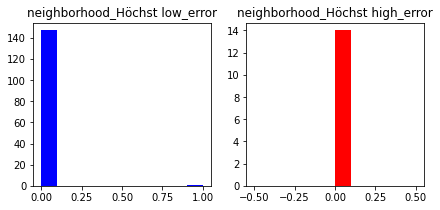

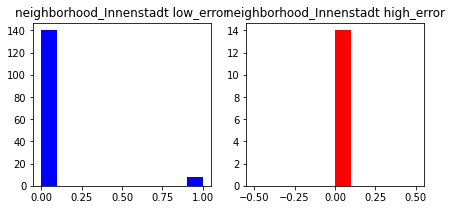

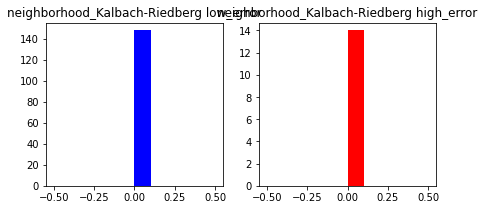

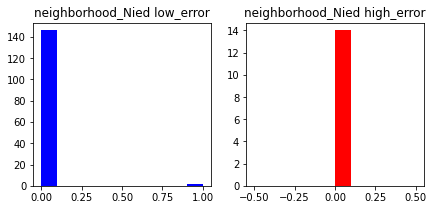

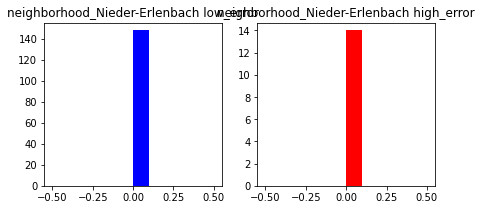

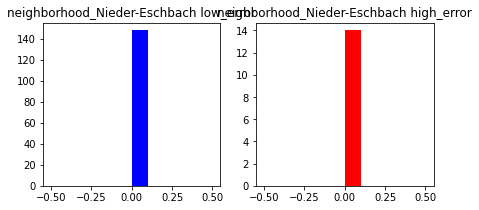

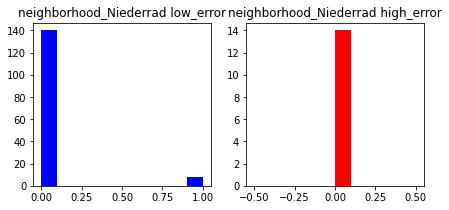

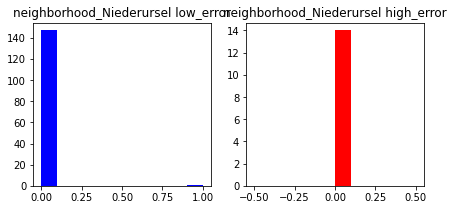

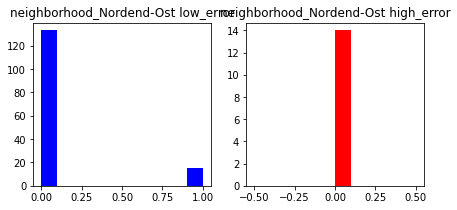

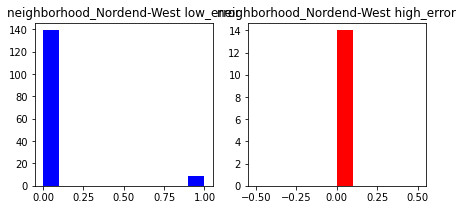

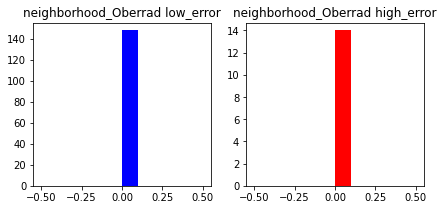

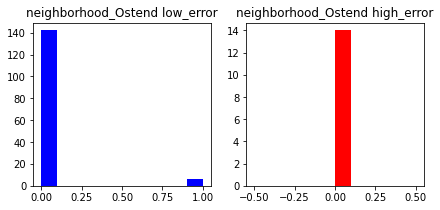

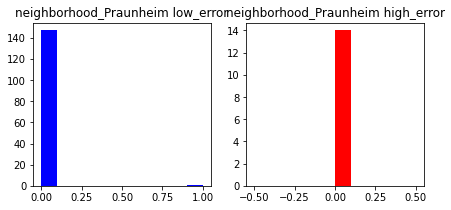

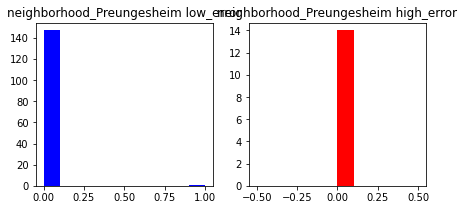

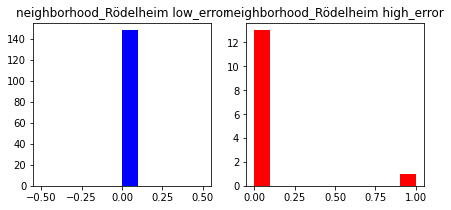

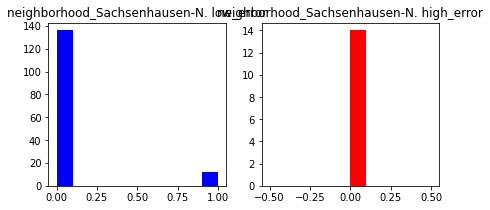

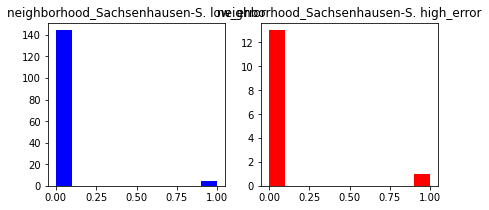

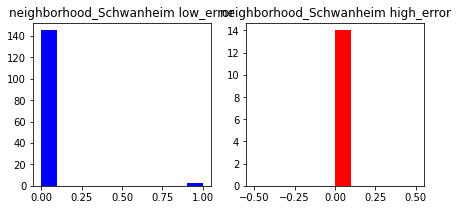

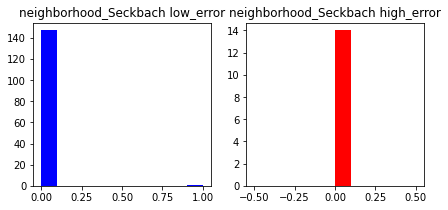

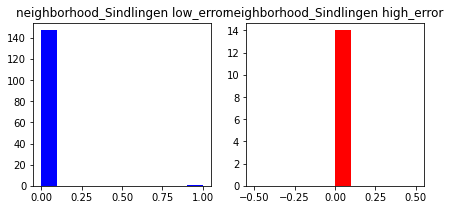

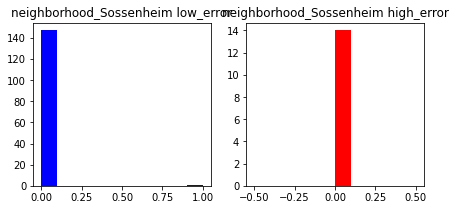

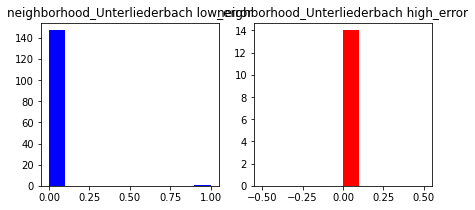

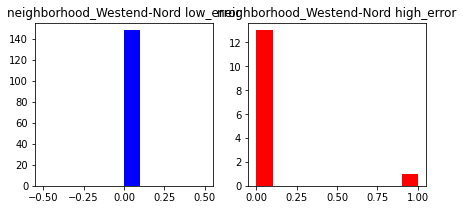

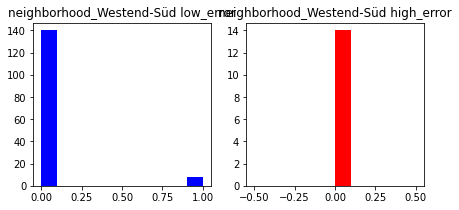

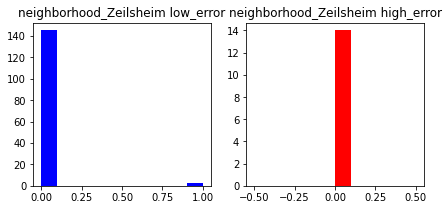

In [155]:


for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()

## How to do a Polynomial Regression?

In [156]:
pf = PolynomialFeatures(degree=2)
pf.fit(X_train_scaled)
X_train_scaled = pf.transform(X_train_scaled)
X_test_scaled = pf.transform(X_test_scaled)

In [157]:
for model, name in zip([lr, ridge, lasso], ['LinearRegression', 'Ridge', 'Lasso']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

LinearRegression mrse_train: 13.182588805851177, mrse_test: 11655822370996.701
Ridge mrse_train: 27.162059618125994, mrse_test: 37.42501542292012


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8384.3481490601, tolerance: 54.67925288135596
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8612.570086536456, tolerance: 67.9490833898305
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9276.516862295037, tolerance: 71.32379118644069
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8729.6484595766

Lasso mrse_train: 32.93204739417549, mrse_test: 39.26719592514263


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5788.814891702401, tolerance: 66.03309695945946
  positive)


In [158]:
poly_features = pf.get_feature_names(X_train.columns)

In [159]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(poly_features[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 9.16945629053837
bedrooms^2, 4.622303403012689
bedrooms room_type_Entire home/apt, 4.620070795227479
neighborhood_Westend-Nord^2, 0.9500188305756719
neighborhood_Gutleutviertel^2, 0.28081806342855636
neighborhood_Gallus^2, 0.18844513343150787
neighborhood_Rödelheim^2, 0.1269804306425593
neighborhood_Fechenheim^2, 0.007926693081990992


In [ ]:
#@title Questionnaire: 
#@markdown 1. Linear Regression is a supervised machine learning algorithm.
#@markdown - A) True
#@markdown - B) False
Ans = "" #@param ["A", "B"] {allow-input: true}

In [160]:
#@markdown 2. It is possible to design a Linear Regression using a neural network.
#@markdown - A) True
#@markdown - B) False
Ans = "" #@param ["A", "B"] {allow-input: true}

In [ ]:
#@markdown 3. Which of the following methods do we use to find the best fit line for data in Linear Regression?
#@markdown - A) Maximum Likelihood
#@markdown - B) Least Square Error
#@markdown - C) Logarithmic Loss
#@markdown - D) Both A and C
Ans = "" #@param ["A", "B", "C", "D"] {allow-input: true}

In [ ]:
#@markdown 4. Lasso regularization can be used for variable selection in Linear Regression.
#@markdown - A) True
#@markdown - B) False
Ans = "" #@param ["A", "B"] {allow-input: true}

In [ ]:
#@markdown 5. Overfitting is more likely to occur when you have huge amount of data.
#@markdown - A) True
#@markdown - B) False
Ans = "" #@param ["A", "B"] {allow-input: true}

In [ ]:
#@markdown 6. In this hands-on project, how many features did we use to predict the target?
#@markdown - A) 3
#@markdown - B) 2
#@markdown - C) 1
#@markdown - D) 0
Ans = "" #@param ["A", "B", "C", "D"] {allow-input: true}

In [161]:
#@markdown 7. As a case-study, our objective is to implement linear regression with one variable to predict profits for a bike sharing company. Let's suppose that Jane is the CEO of a bike sharing startup and she's considering different cities to expand into. Her company already has bikes in various cities and she has the data for profits and populations from the cities. Jane would like to use this information to help her select which city to expand to next.

#@markdown For her exploratory data analysis phase, she wants to use a scatter plot to visualize the '**Population**' on the x-axis and '**Profits**' on the y-axis using her data from a dataframe '**df**'. Which option would you suggest her to create the scatter plot? 
#@markdown - A) plot.scatter(x='Population', y='Profits')
#@markdown - B) plot.scatter(x='Population', y='Profits', data=df)
#@markdown - C) plot.scatterplot(x='Population', y='Profits', data=df)
#@markdown - D) plot.scatterplot(x='Profits', y='Population')

Ans = "" #@param ["A", "B", "C", "D"] {allow-input: true}